# Data Vizualization Steps

## 0 Package + Data Imports

In [1]:
# Importing packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading csvs
products_df = pd.read_csv("data_clean/products_cl.csv")
orderlines_df = pd.read_csv("data_clean/orderlines_cl.csv")
orders_df = pd.read_csv("data_clean/orders_cl.csv")
brands_df = pd.read_csv("data_clean/brands_cl.csv")

In [ ]:
# Remove if successful
# # Loading the other ppls csvs
# products_alt_df = pd.read_csv("data/semira/products_cat_alt.csv")
# orderlines_df = pd.read_csv("data/orderlines_ft.csv")
# orders_df = pd.read_csv("data/orders_ft.csv")
# brands_df = pd.read_csv("data/brands.csv")
# orderlines_xt = pd.read_csv('data/orderlines_xt.csv')

# 1 Preparation for Data Vizualization

## 1.1 Checking Data Type and Completeness

In [3]:
# Displaying structure of the dfs
products_df.head(1)

,sku,name,desc,listed_price,in_stock,type,man,category
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,RAI,Accessories & Peripherals


In [4]:
products_df.nunique()

sku             5061
name            5021
desc            3752
listed_price    1020
in_stock           2
type             114
man              195
category          16
dtype: int64

In [7]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5061 entries, 0 to 5060
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku           5061 non-null   object 
 1   name          5061 non-null   object 
 2   desc          5061 non-null   object 
 3   listed_price  5061 non-null   float64
 4   in_stock      5061 non-null   int64  
 5   type          5061 non-null   int64  
 6   man           5061 non-null   object 
 7   category      5061 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 316.4+ KB


In [7]:
orderlines_df.head(1)

,id,order_id,qty,sku,unit_price,date,man,listed_price,discount_pct,discount_raw
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,OWC,60.99,22.13,13.5


In [ ]:
# Converting datetime format
orderlines_df["date"] = pd.to_datetime(orderlines_df["date"])
orderlines_df.nunique()

id              52705
order_id        40482
qty                27
sku              5074
unit_price       4295
date            52317
man               195
listed_price     1020
discount_pct     4060
discount_raw    16093
dtype: int64

In [9]:
orders_df.head(1)

,order_id,created_date,total_paid,state
0,241423,2017-11-06 13:10:02,136.15,Completed


In [10]:
# Converting datetime format
orders_df["created_date"] = pd.to_datetime(orders_df["created_date"])
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40482 entries, 0 to 40481
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      40482 non-null  int64         
 1   created_date  40482 non-null  datetime64[ns]
 2   total_paid    40482 non-null  float64       
 3   state         40482 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.2+ MB


In [13]:
brands_df.head(1)

,short,long
0,8MO,8Mobility


In [11]:
# Renaming short into man for easier merging
brands_df.rename(columns = {'short': 'man'}, inplace = True)

# Renaming long into brand for more intuitive understanding
brands_df.rename(columns = {'long': 'brand'}, inplace = True)

## 1.2 Performing merges
This serves as a preparation for aggregation and vizulization

In [12]:
# Creating a orderlines copy and merging it with the category entry from products
ol_prod_df = pd.merge(orderlines_df, products_df[['sku', 'name', 'category']], on = 'sku', how = 'left')

In [13]:
ol_prod_df.head(1)

,id,order_id,qty,sku,unit_price,date,man,listed_price,discount_pct,discount_raw,name,category
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,OWC,60.99,22.13,13.5,OWC In-line Digital Temperature Sensor Kit HDD...,Other


In [14]:
#adding brands column to the table
ol_prod_brand_df = pd.merge(ol_prod_df, brands_df[['man', 'brand']], on = 'man', how = 'left')

In [15]:
ol_prod_brand_df.tail(10)

,id,order_id,qty,sku,unit_price,date,man,listed_price,discount_pct,discount_raw,name,category,brand
87796,1649440,527035,1,APP0498,23.00,2018-03-14 11:41:55,APP,25.0,60.04,2.00,Apple Lightning connector cable to USB 50cm,Accessories & Peripherals,Apple
87797,1649441,527034,1,APP0927,13.99,2018-03-14 11:42:01,APP,25.0,60.04,11.01,EarPods Apple Headphones with Remote and Mic (...,Audio & Sound,Apple
87798,1649441,527034,1,APP0927,13.99,2018-03-14 11:42:01,APP,35.0,60.03,21.01,EarPods Apple Headphones with Remote and Mic (...,Audio & Sound,Apple
87799,1649446,527042,1,APP0927,13.99,2018-03-14 11:42:38,APP,35.0,60.03,21.01,EarPods Apple Headphones with Remote and Mic (...,Audio & Sound,Apple
87800,1649447,527035,1,APP0698,9.99,2018-03-14 11:42:41,APP,25.0,8.00,15.01,Apple Lightning Cable Connector to USB 1m Whit...,Accessories & Peripherals,Apple
87801,1649447,527035,1,APP0698,9.99,2018-03-14 11:42:41,APP,25.0,60.04,15.01,Apple Lightning Cable Connector to USB 1m Whit...,Accessories & Peripherals,Apple
87802,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01,APP,25.0,60.04,15.01,Apple Lightning Cable Connector to USB 1m Whit...,Accessories & Peripherals,Apple
87803,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36,APP,25.0,60.04,15.01,Apple Lightning Cable Connector to USB 1m Whit...,Accessories & Peripherals,Apple
87804,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35,APP,25.0,60.04,15.01,Apple Lightning Cable Connector to USB 1m Whit...,Accessories & Peripherals,Apple
87805,1649593,527112,1,APP0698,9.99,2018-03-14 11:58:13,APP,25.0,60.04,15.01,Apple Lightning Cable Connector to USB 1m Whit...,Accessories & Peripherals,Apple


In [16]:
# Merging orders column total paid into the table
ol_xt_df = pd.merge(ol_prod_brand_df, orders_df[['order_id', 'total_paid']], on = 'order_id', how = 'left')

In [18]:
ol_xt_df.shape

(87806, 14)

In [17]:
ol_xt_df.nunique()

id              52705
order_id        40482
qty                27
sku              5074
unit_price       4295
date            52317
man               195
listed_price     1020
discount_pct     4060
discount_raw    16093
name             5021
category           16
brand             176
total_paid       9796
dtype: int64

In [19]:
ol_xt_df['category'].isna().value_counts()

category
False    87745
True        61
Name: count, dtype: int64

In [ ]:
#Filtering out rows that have no entry for category
ol_xt_df = ol_xt_df.loc[~ol_xt_df['category'].isna(),:]

In [21]:
# export extended orderlines dataframe
ol_xt_df.to_csv("data_clean/orderlines_xt.csv", index=False)

## 2 Evaluation
First data is being aggregated and sorted by most popular product categories

### 2.1 Aggregation

In [ ]:
# Imports directly after the final cleaning touches
ol_xt_df = pd.read_csv('data/orderlines_xt.csv')

In [23]:
ol_xt_df.head()

,id,order_id,qty,sku,unit_price,date,man,listed_price,discount_pct,discount_raw,name,category,brand,total_paid
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,OWC,60.99,22.13,13.50,OWC In-line Digital Temperature Sensor Kit HDD...,Other,OWC,51.48
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,IOT,22.95,17.25,3.96,iOttie Easy View 2 Car Black Support,Accessories & Peripherals,iOttie,18.99
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,APP,89.00,18.89,16.81,Apple 85W MagSafe 2 charger MacBook Pro screen...,Power & Batteries,Apple,72.19
3,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,CRU,76.99,20.90,16.09,(Open) Crucial 240GB SSD 7mm BX200,Open & Second Hand - Misc,Crucial,65.89
4,1119145,299561,1,PEB0015,142.49,2017-01-01 02:38:50,PEB,299.99,52.50,157.50,Pebble Smartwatch Time Steel Black,Accessories & Peripherals,Pebble,154.48


In [35]:
# Creating dfs for top - n sold items and top - n revenue
top_cat_count_df = (
                    ol_xt_df.groupby("category", as_index=False)
                    ["qty"].sum()
                    .nlargest(10, "qty")
                    )
top_cat_count_df.rename(columns = {'qty': 'total_units'}, inplace = True)
top_cat_count_df

,category,total_units
14,Storage Devices,27036
0,Accessories & Peripherals,20657
4,Cases & Protectors,14854
10,Other,11430
1,Audio & Sound,4982
11,Power & Batteries,3735
6,Mobile Phones & Accessories,3034
12,Repair & Maintenance,2966
13,Smartwatches & Accessories,2776
15,Tablets & E-Readers,2663


In [24]:
# calculating the real total item paid price multiplying quantity and unit_price
# total_paid from orders is just for the whole order_id. not to be used for revenue
ol_xt_df["order_product_price"] = ol_xt_df["qty"] * ol_xt_df["unit_price"]
ol_xt_df.head(1)

,id,order_id,qty,sku,unit_price,date,man,listed_price,discount_pct,discount_raw,name,category,brand,total_paid,order_product_price
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,OWC,60.99,22.13,13.5,OWC In-line Digital Temperature Sensor Kit HDD...,Other,OWC,51.48,47.49


In [28]:
# Creating similar dataframe for revenue numbers
top_cat_revenue_df = (
                     ol_xt_df.groupby("category", as_index=False)
                     ["order_product_price"].sum()
                     .nlargest(10, "order_product_price")
                     )
top_cat_revenue_df.rename(columns = {'order_product_price': 'revenue'}, inplace = True)
top_cat_revenue_df

,category,revenue
14,Storage Devices,4063727.83
10,Other,2405784.39
0,Accessories & Peripherals,873921.84
7,Monitors & Display,828795.30
6,Mobile Phones & Accessories,660942.35
1,Audio & Sound,547387.35
4,Cases & Protectors,396770.69
15,Tablets & E-Readers,358858.95
13,Smartwatches & Accessories,350720.35
11,Power & Batteries,254229.59


In [30]:
# Creating a partial dataframe snapshot where only top10 revenue categories remain
top_cat_test_df = ol_xt_df.loc[ol_xt_df['category'].isin(top_cat_revenue_df['category']),:]
top_cat_test_df.head(1)

,id,order_id,qty,sku,unit_price,date,man,listed_price,discount_pct,discount_raw,name,category,brand,total_paid,order_product_price
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,OWC,60.99,22.13,13.5,OWC In-line Digital Temperature Sensor Kit HDD...,Other,OWC,51.48,47.49


### 3.2 Static vizualizations

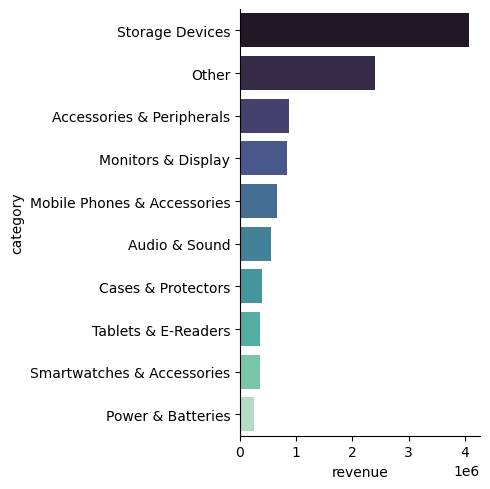

In [32]:
# Creating an overview of top10 revenue and sold items
sns.catplot(data=top_cat_revenue_df,
            kind='bar',
            y="category",
            x="revenue",
            palette="mako",
            );

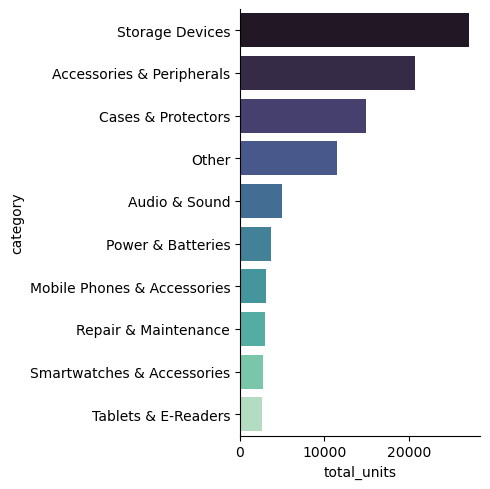

In [36]:
sns.catplot(data=top_cat_count_df,
            kind='bar',
            y="category",
            x="total_units",
            palette="mako",
            );

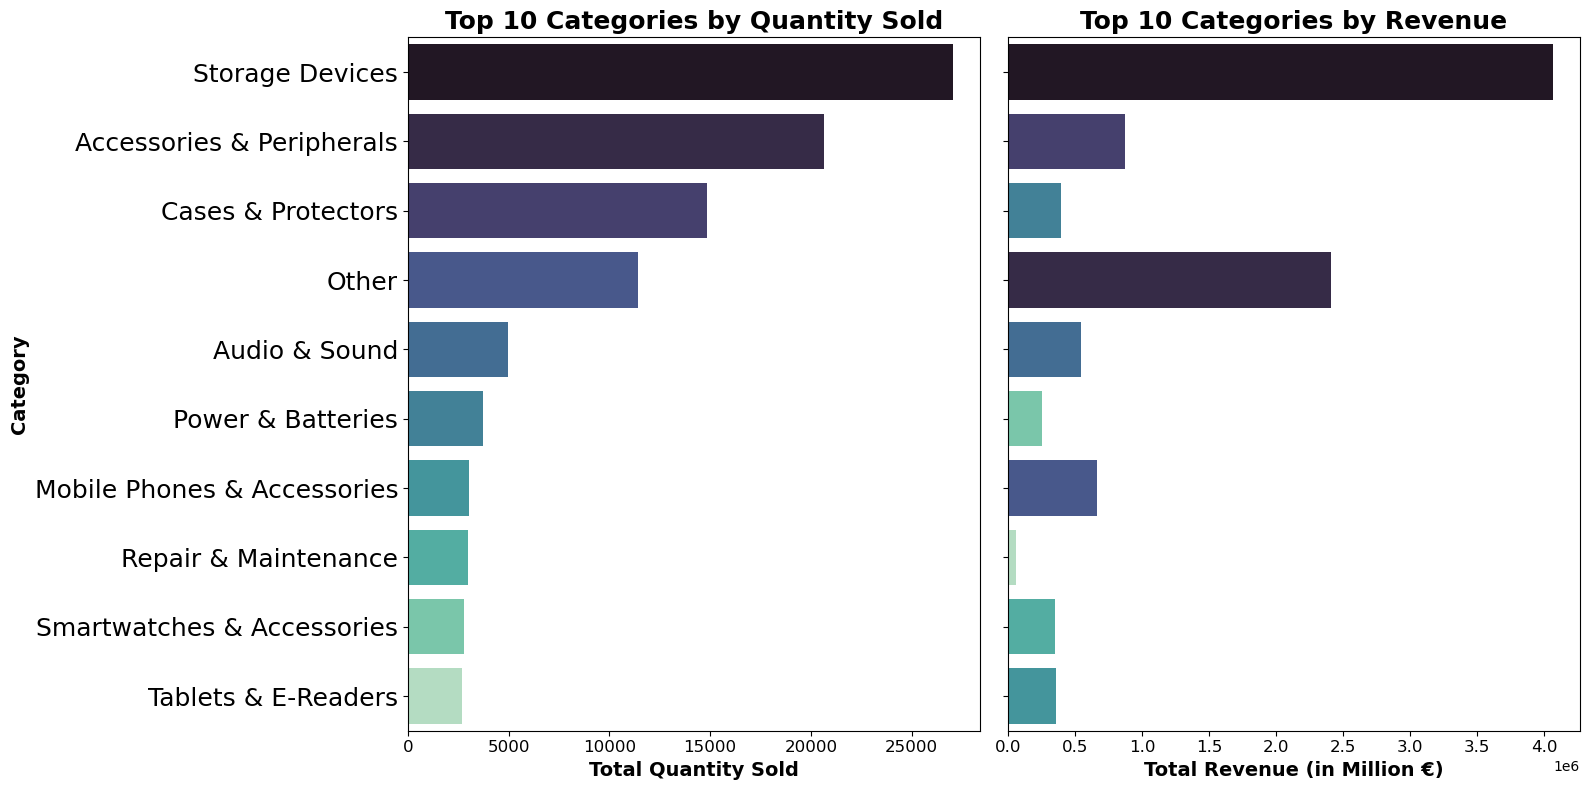

In [38]:
# Combining them in one joint graphic

# Aggregate data by category
category_stats = ol_xt_df.groupby('category').agg({'qty': 'sum', 'order_product_price': 'sum'}).reset_index()

# Get top categories by quantity sold
top_qty_categories = category_stats.sort_values(by='qty', ascending=False).head(10)['category']

# filter the category_stats 
top_categories = category_stats[category_stats['category'].isin(top_qty_categories)]

# setting up figure and axes
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

#font size settings
title_font = {'fontsize': 18, 'fontweight': 'bold'}
label_font = {'fontsize': 14, 'fontweight': 'bold'}
tick_fontsize = 12
category_fontsize =18

# bar plot for quantity sold
sns.barplot(data=top_categories.sort_values(by='qty', ascending=False), y='category', x='qty', ax=axes[0], palette='mako')
axes[0].set_xlabel('Total Quantity Sold', **label_font)
axes[0].set_ylabel('Category', **label_font)
axes[0].set_title('Top 10 Categories by Quantity Sold', **title_font)
axes[0].tick_params(axis='both', labelsize=tick_fontsize)

for label in axes[0].get_yticklabels():
    label.set_fontsize(category_fontsize)

# bar plot for revenue
sns.barplot(data=top_categories.sort_values(by='order_product_price', ascending=False), y='category', x='order_product_price', ax=axes[1], palette='mako')
axes[1].set_xlabel('Total Revenue (in Million €)', **label_font)
axes[1].set_ylabel('')  # Remove redundant y-axis label
axes[1].set_title('Top 10 Categories by Revenue', **title_font)
axes[1].tick_params(axis='both', labelsize=tick_fontsize)

# display and save
plt.tight_layout()
plt.savefig("top_qty_revenue", dpi=300)
plt.show()

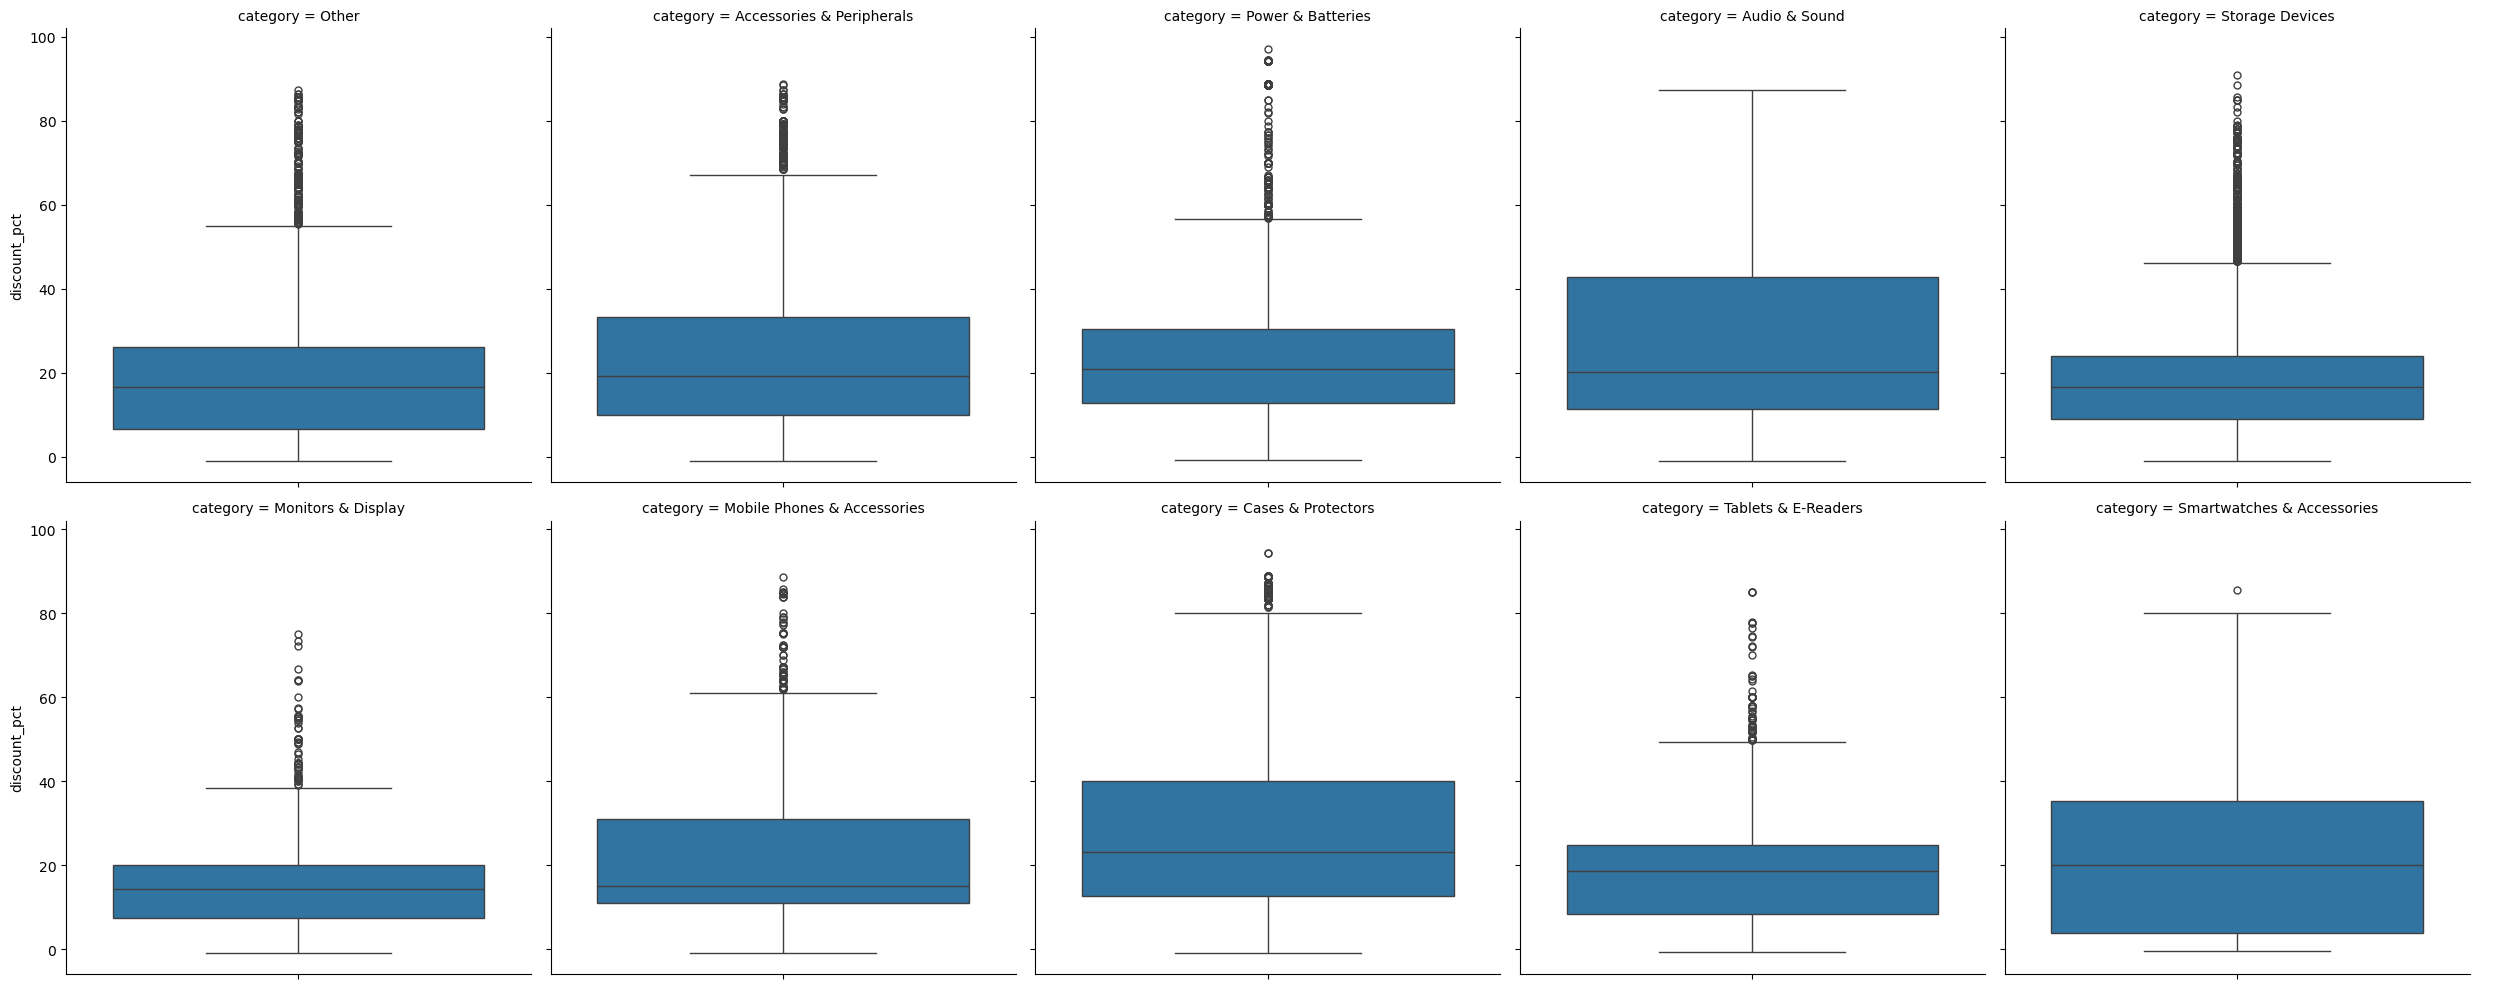

In [39]:
sns.catplot(data=top_cat_test_df,
            kind = 'box',
            y="discount_pct",
            col="category",
            col_wrap=5,
           );

### 3.3 Time-Series Vizualizations
Include both sold units and revenue graphs. Can also be used for other categories outside the top10 that were done here

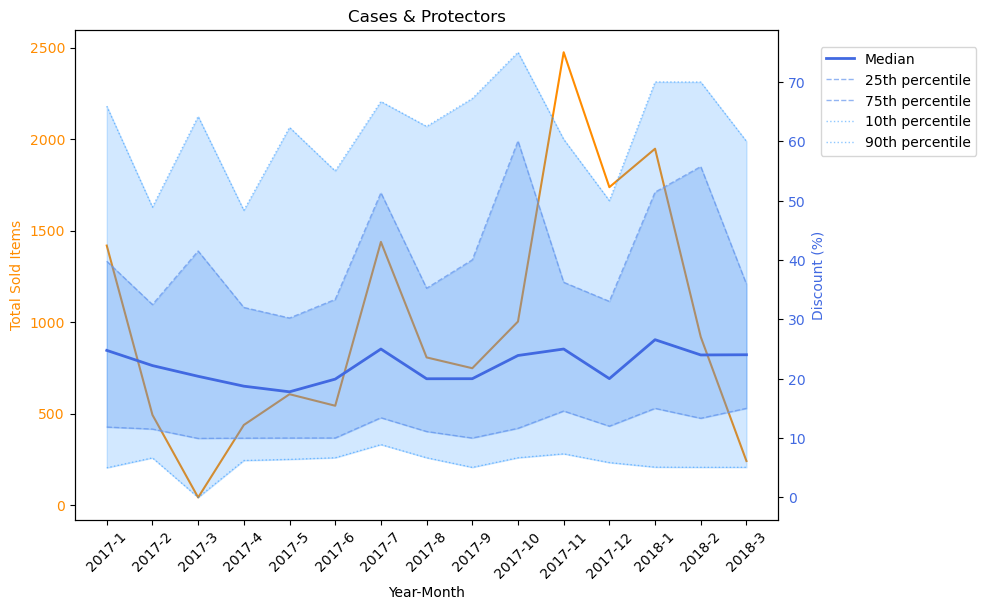

In [ ]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Cases & Protectors', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

# Updated aggregation to include percentiles
temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({
                'qty': 'sum', 
                'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
            })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['qty_monthly', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Total Sold Items', color=color)
sns.lineplot(x=x_labels, y='qty_monthly', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.05, 0.98))

fig.tight_layout()
plt.title('Cases & Protectors')
plt.show();

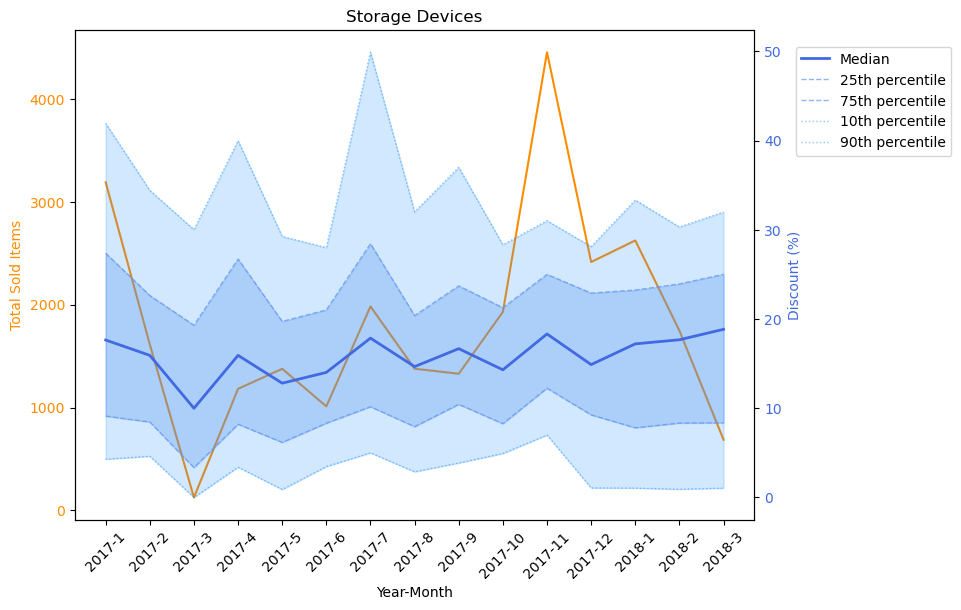

In [ ]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Storage Devices', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

# Updated aggregation to include percentiles
temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({
                'qty': 'sum', 
                'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
            })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['qty_monthly', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Total Sold Items', color=color)
sns.lineplot(x=x_labels, y='qty_monthly', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.3, 0.98))

fig.tight_layout()
plt.title('Storage Devices')
plt.show();

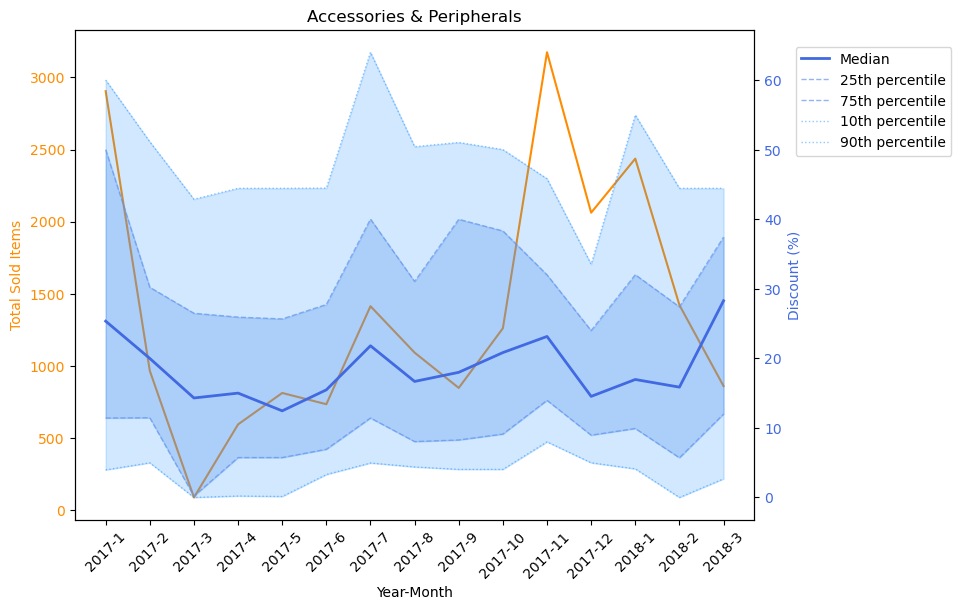

In [43]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Accessories & Peripherals', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

# Updated aggregation to include percentiles
temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({
                'qty': 'sum', 
                'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
            })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['qty_monthly', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Total Sold Items', color=color)
sns.lineplot(x=x_labels, y='qty_monthly', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.3, 0.98))


fig.tight_layout()
plt.title('Accessories & Peripherals')
plt.show();

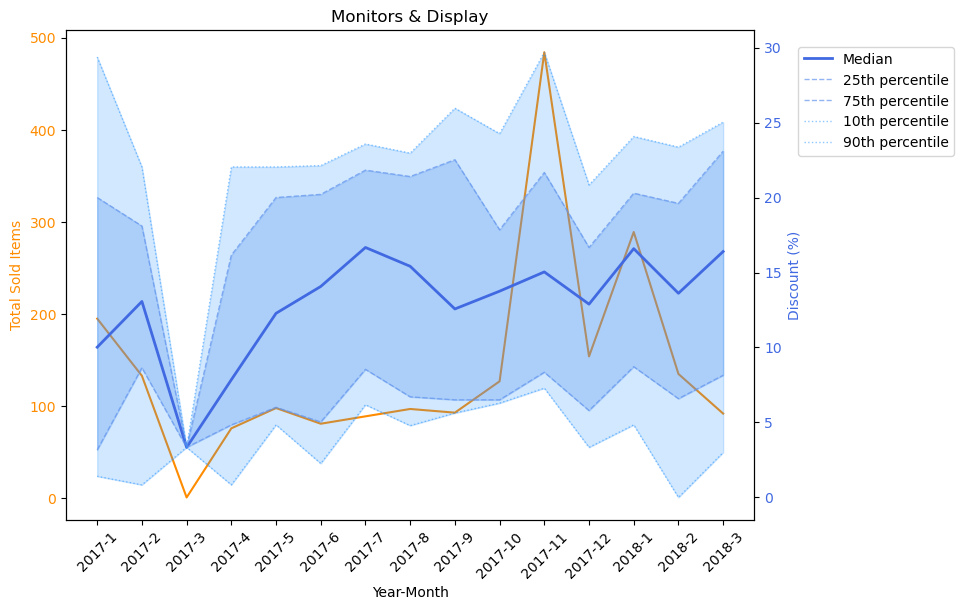

In [44]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Monitors & Display', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

# Updated aggregation to include percentiles
temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({
                'qty': 'sum', 
                'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
            })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['qty_monthly', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Total Sold Items', color=color)
sns.lineplot(x=x_labels, y='qty_monthly', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.3, 0.98))


fig.tight_layout()
plt.title('Monitors & Display')
plt.show();

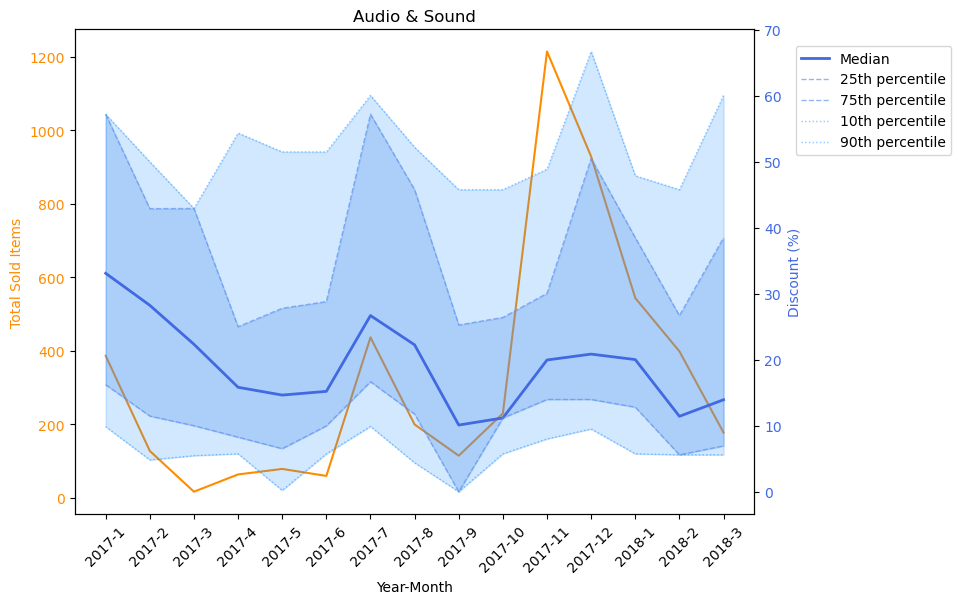

In [45]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Audio & Sound', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

# Updated aggregation to include percentiles
temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({
                'qty': 'sum', 
                'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
            })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['qty_monthly', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Total Sold Items', color=color)
sns.lineplot(x=x_labels, y='qty_monthly', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.3, 0.98))


fig.tight_layout()
plt.title('Audio & Sound')
plt.show();

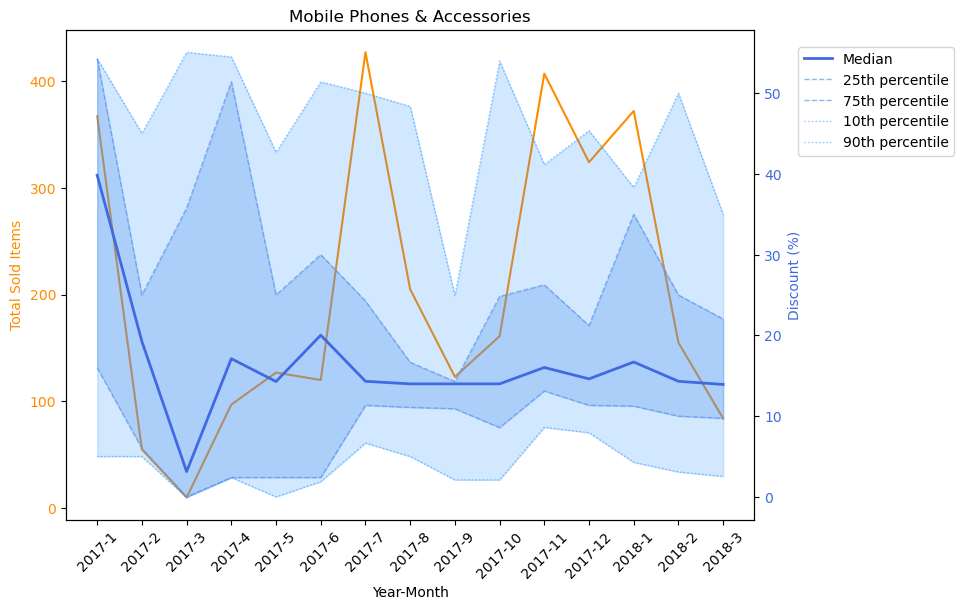

In [46]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Mobile Phones & Accessories', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

# Updated aggregation to include percentiles
temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({
                'qty': 'sum', 
                'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
            })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['qty_monthly', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Total Sold Items', color=color)
sns.lineplot(x=x_labels, y='qty_monthly', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.3, 0.98))


fig.tight_layout()
plt.title('Mobile Phones & Accessories')
plt.show();

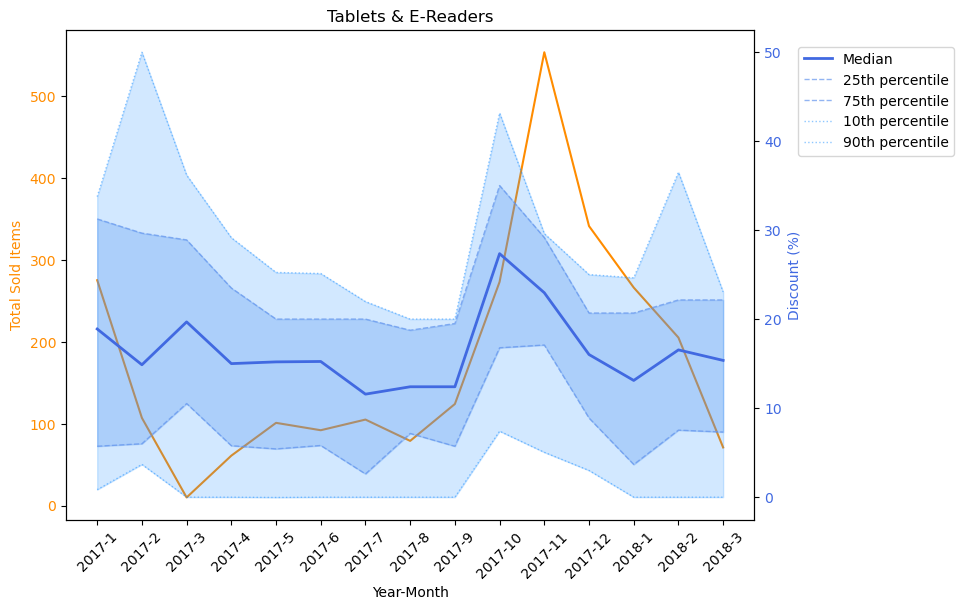

In [47]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Tablets & E-Readers', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

# Updated aggregation to include percentiles
temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({
                'qty': 'sum', 
                'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
            })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['qty_monthly', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Total Sold Items', color=color)
sns.lineplot(x=x_labels, y='qty_monthly', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.3, 0.98))


fig.tight_layout()
plt.title('Tablets & E-Readers')
plt.show();

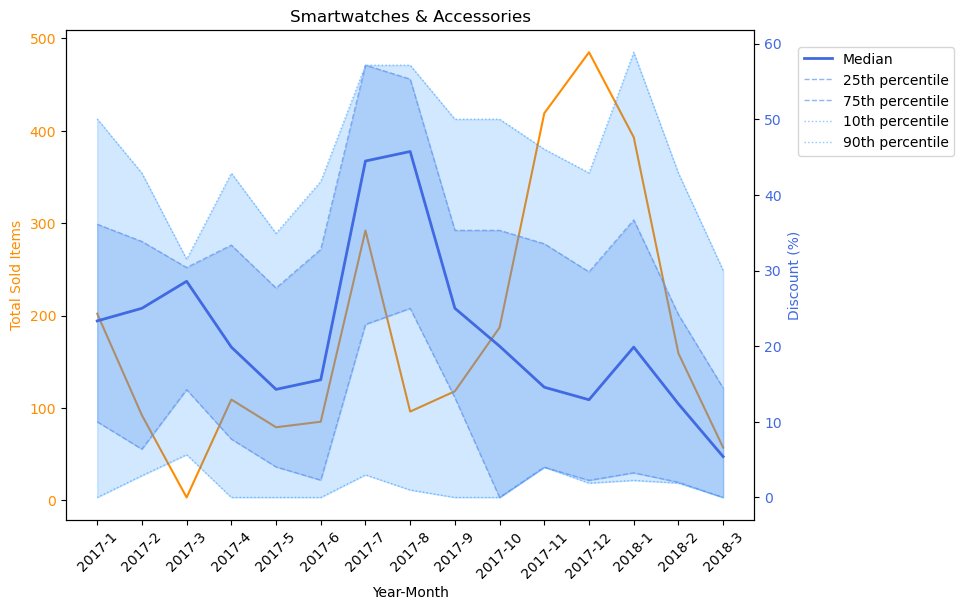

In [48]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Smartwatches & Accessories', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

# Updated aggregation to include percentiles
temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({
                'qty': 'sum', 
                'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
            })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['qty_monthly', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Total Sold Items', color=color)
sns.lineplot(x=x_labels, y='qty_monthly', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.3, 0.98))


fig.tight_layout()
plt.title('Smartwatches & Accessories')
plt.show();

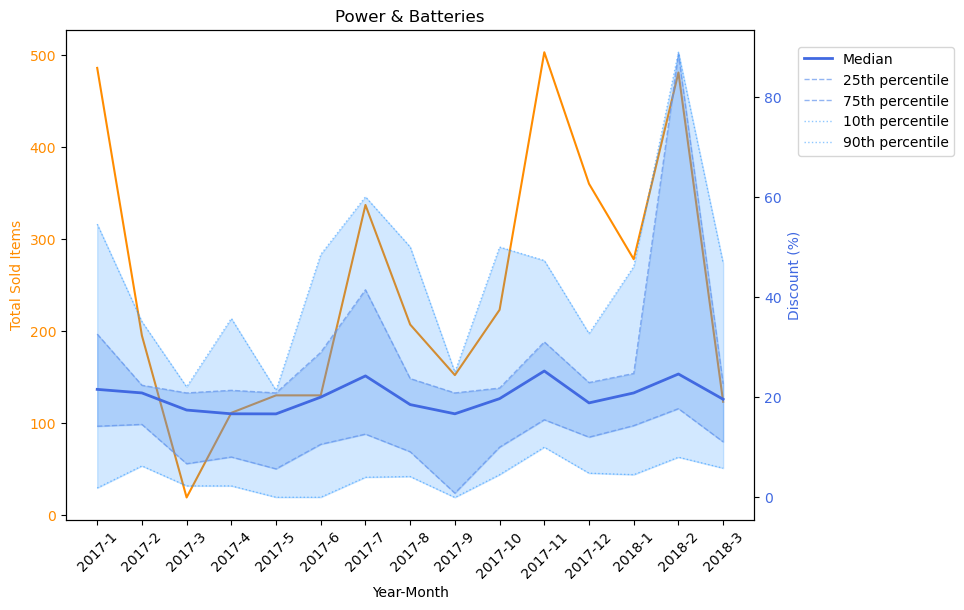

In [49]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Power & Batteries', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

# Updated aggregation to include percentiles
temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({
                'qty': 'sum', 
                'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
            })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['qty_monthly', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Total Sold Items', color=color)
sns.lineplot(x=x_labels, y='qty_monthly', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.3, 0.98))


fig.tight_layout()
plt.title('Power & Batteries')
plt.show();

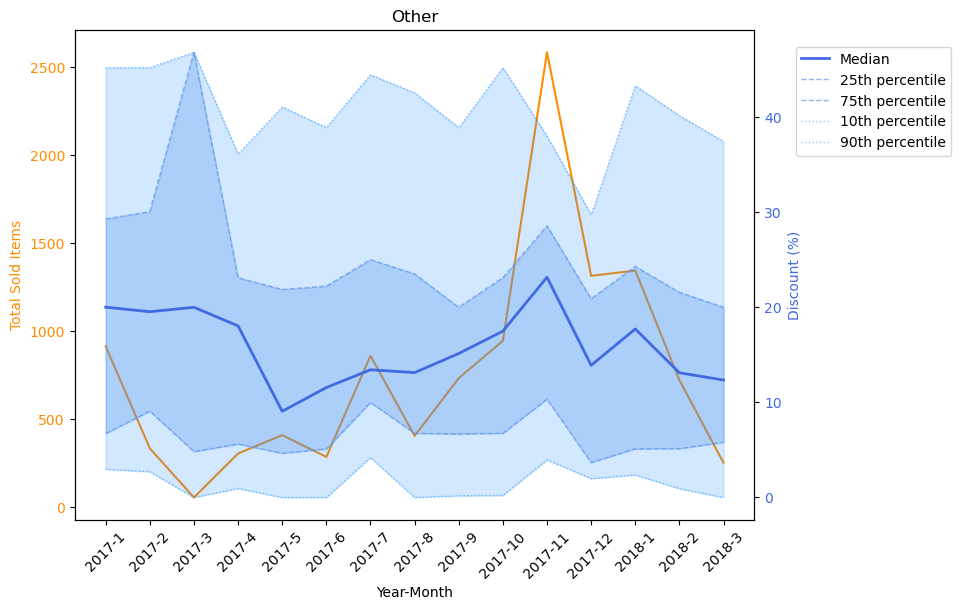

In [50]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Other', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

# Updated aggregation to include percentiles
temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({
                'qty': 'sum', 
                'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
            })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['qty_monthly', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Total Sold Items', color=color)
sns.lineplot(x=x_labels, y='qty_monthly', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.3, 0.98))


fig.tight_layout()
plt.title('Other')
plt.show();

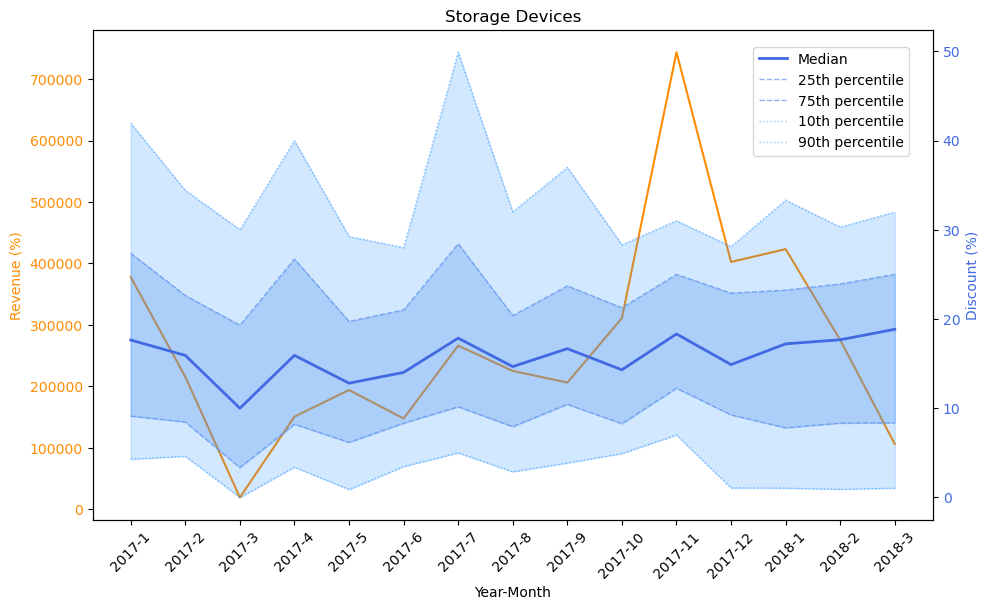

In [51]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Storage Devices', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

# Updated aggregation to include percentiles
temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({
                'order_product_price': 'sum', 
                'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
            })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['order_product_price', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Revenue (%)', color=color)
sns.lineplot(x=x_labels, y='order_product_price', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='upper right', bbox_to_anchor=(0.98, 0.98))

fig.tight_layout()
plt.title('Storage Devices')
plt.show();

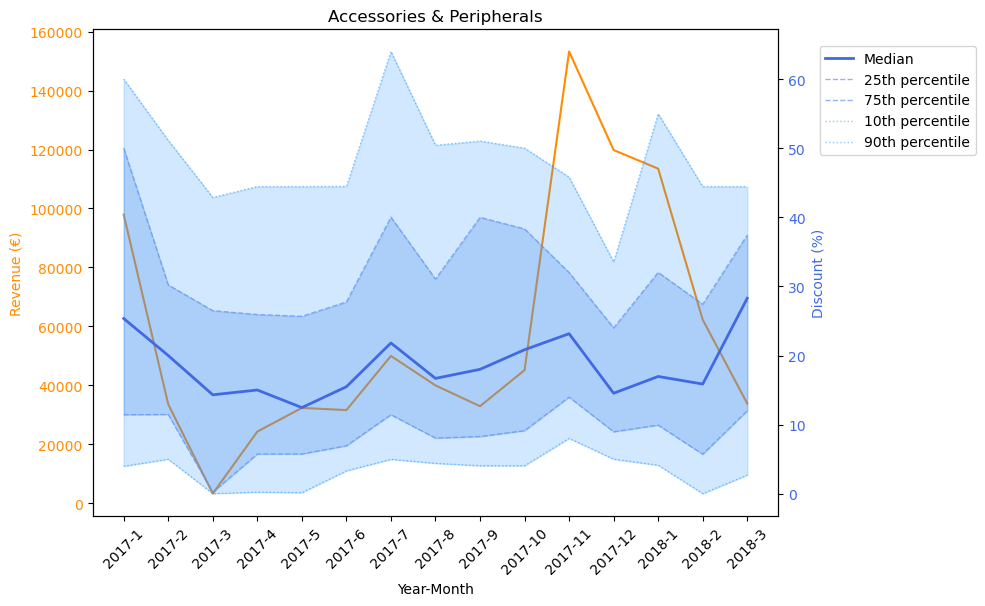

In [52]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Accessories & Peripherals', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({'order_product_price': 'sum', 
                    'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
                    })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['order_product_price', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Revenue (€)', color=color)
sns.lineplot(x=x_labels, y='order_product_price', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.05, 0.98))

fig.tight_layout()
plt.title('Accessories & Peripherals')
plt.show();

# color = 'lightseagreen'
# ax1.set_xlabel('Year-Month')
# ax1.set_ylabel('revenue (€)', color=color)
# sns.lineplot(x=temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str), y='order_product_price', data=temp_agg_df_alt, ax=ax1 , color=color)
# ax1.tick_params(axis='y', labelcolor=color)
# ax1.tick_params(axis='x', rotation=45)

# ax2 = ax1.twinx()

# color = 'navy'
# ax2.set_ylabel('discount (%)', color=color)
# sns.lineplot(x=temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str), y='discount_pct', data=temp_agg_df_alt, ax=ax2, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()
# plt.title('Accessories & Peripherals')
# plt.show();

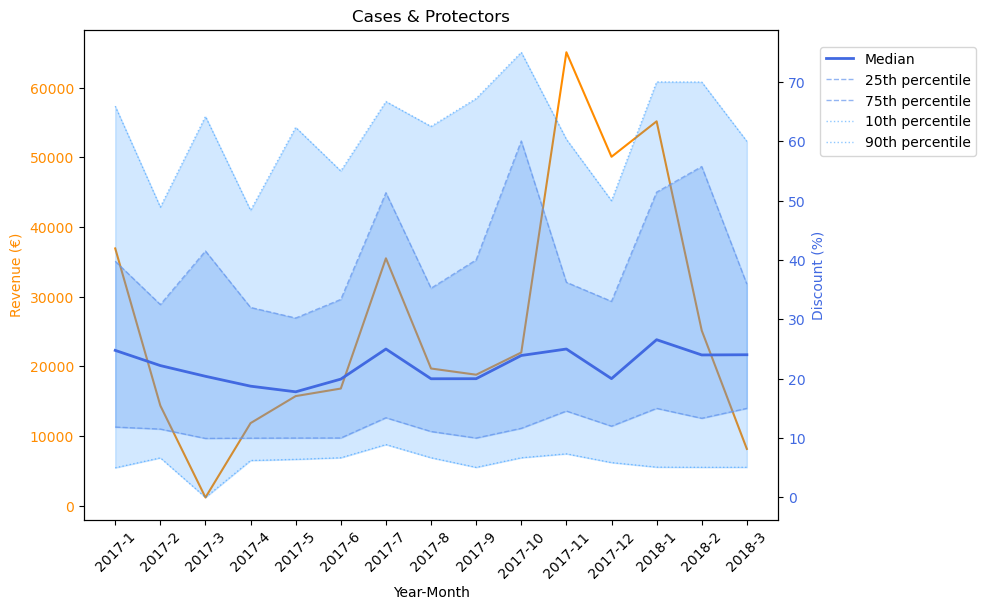

In [ ]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Cases & Protectors', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({'order_product_price': 'sum', 
                    'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
                    })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['order_product_price', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Revenue (€)', color=color)
sns.lineplot(x=x_labels, y='order_product_price', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.05, 0.98))

fig.tight_layout()
plt.title('Cases & Protectors')
plt.show();

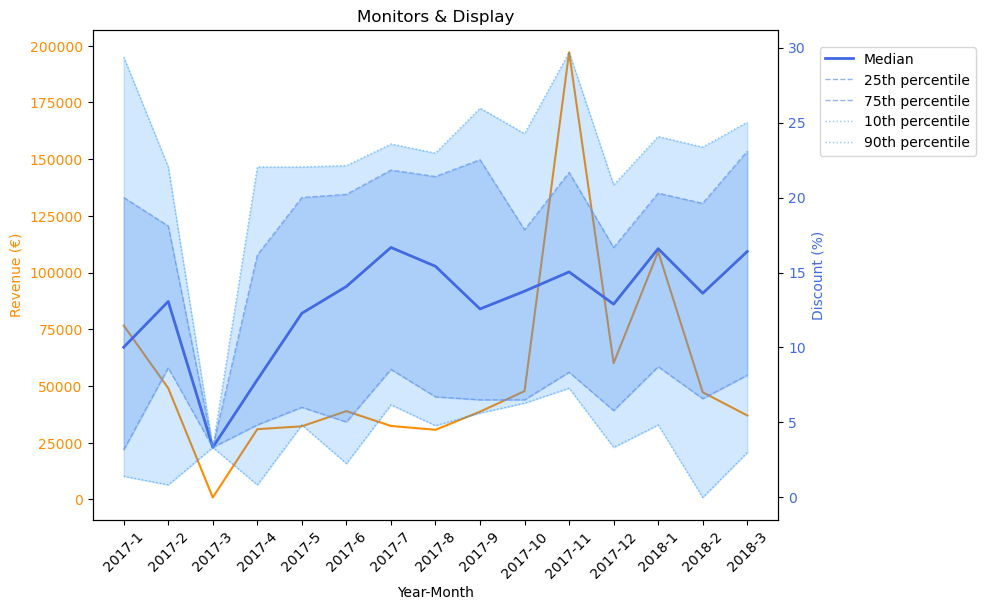

In [ ]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Monitors & Display', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({'order_product_price': 'sum', 
                    'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
                    })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['order_product_price', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Revenue (€)', color=color)
sns.lineplot(x=x_labels, y='order_product_price', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.05, 0.98))

fig.tight_layout()
plt.title('Monitors & Display')
plt.show();

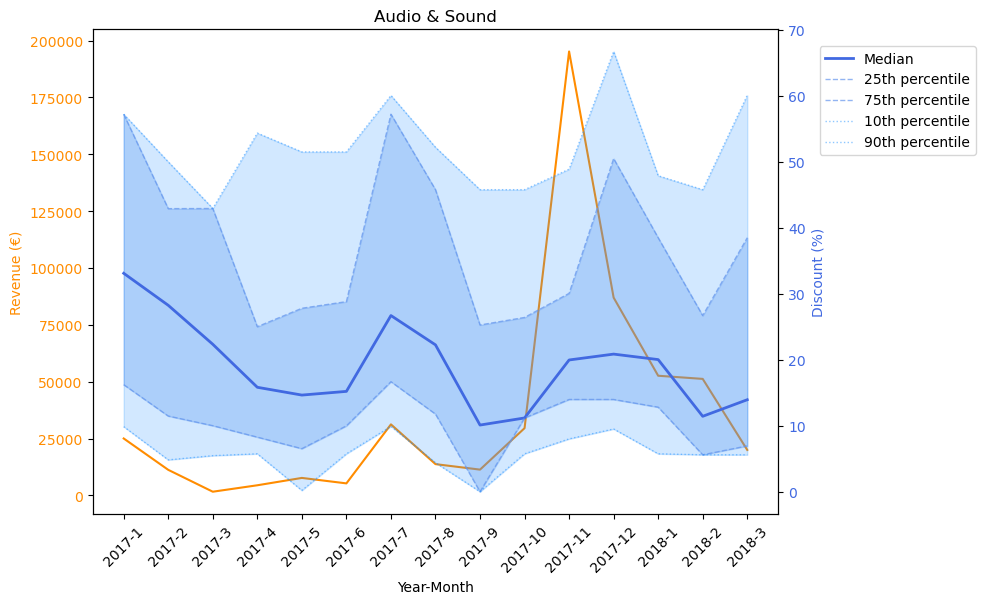

In [ ]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Audio & Sound', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({'order_product_price': 'sum', 
                    'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
                    })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['order_product_price', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Revenue (€)', color=color)
sns.lineplot(x=x_labels, y='order_product_price', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.05, 0.98))

fig.tight_layout()
plt.title('Audio & Sound')
plt.show();

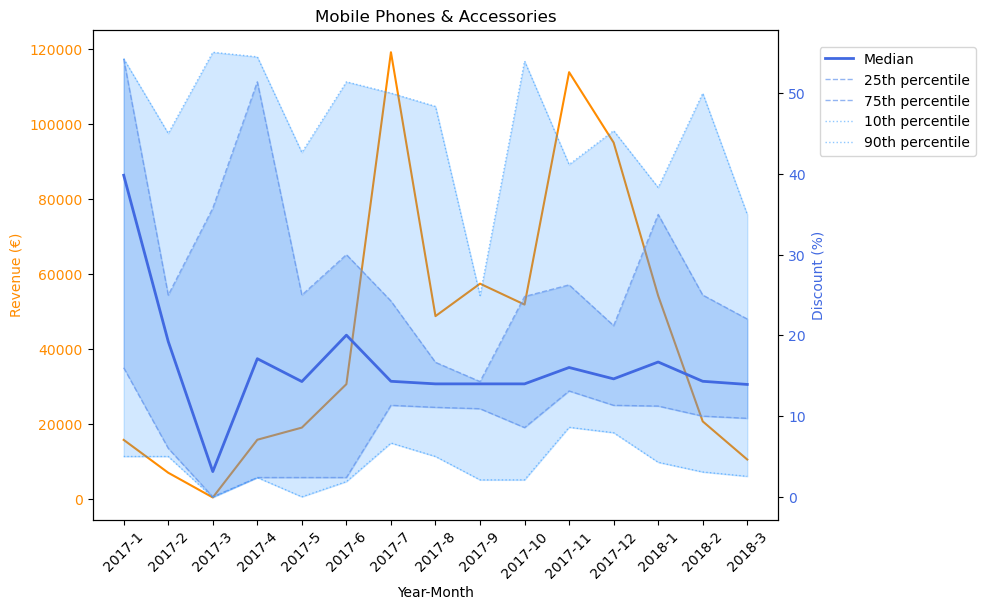

In [ ]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Mobile Phones & Accessories', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({'order_product_price': 'sum', 
                    'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
                    })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['order_product_price', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Revenue (€)', color=color)
sns.lineplot(x=x_labels, y='order_product_price', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.05, 0.98))

fig.tight_layout()
plt.title('Mobile Phones & Accessories')
plt.show();

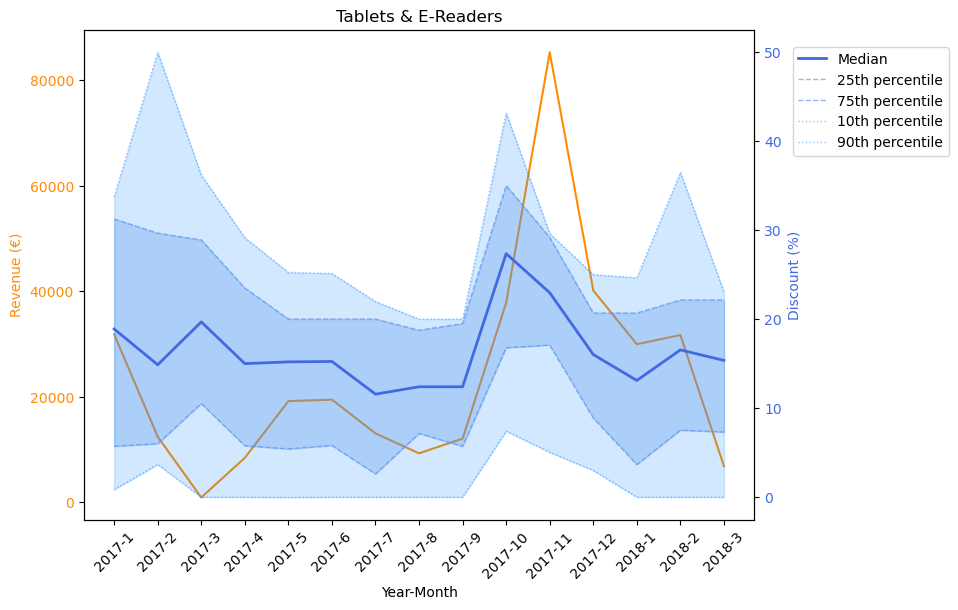

In [ ]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Tablets & E-Readers', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({'order_product_price': 'sum', 
                    'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
                    })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['order_product_price', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Revenue (€)', color=color)
sns.lineplot(x=x_labels, y='order_product_price', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.3, 0.98))

fig.tight_layout()
plt.title('Tablets & E-Readers')
plt.show();

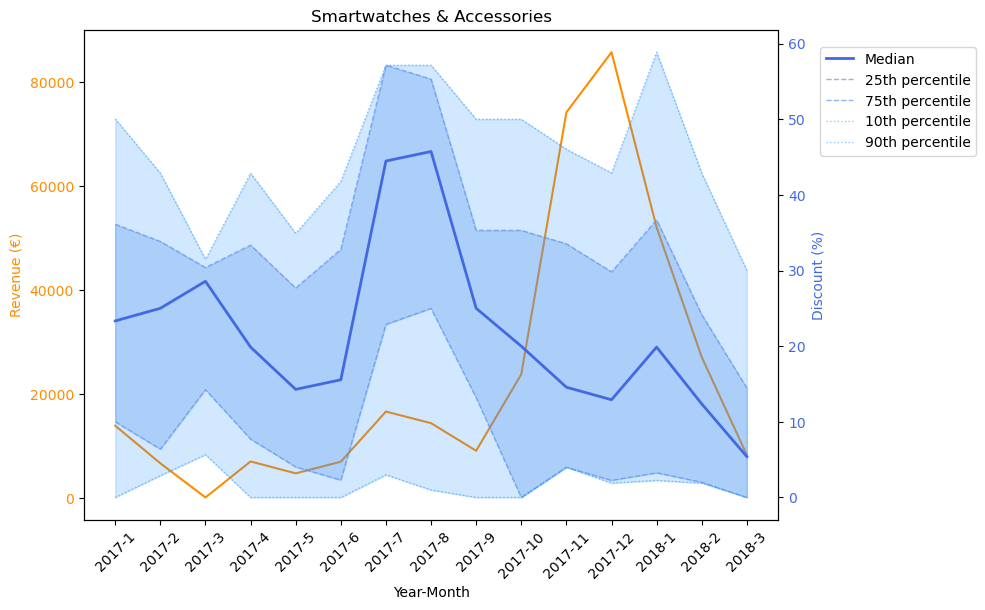

In [ ]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Smartwatches & Accessories', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({'order_product_price': 'sum', 
                    'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
                    })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['order_product_price', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Revenue (€)', color=color)
sns.lineplot(x=x_labels, y='order_product_price', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.05, 0.98))

fig.tight_layout()
plt.title('Smartwatches & Accessories')
plt.show();

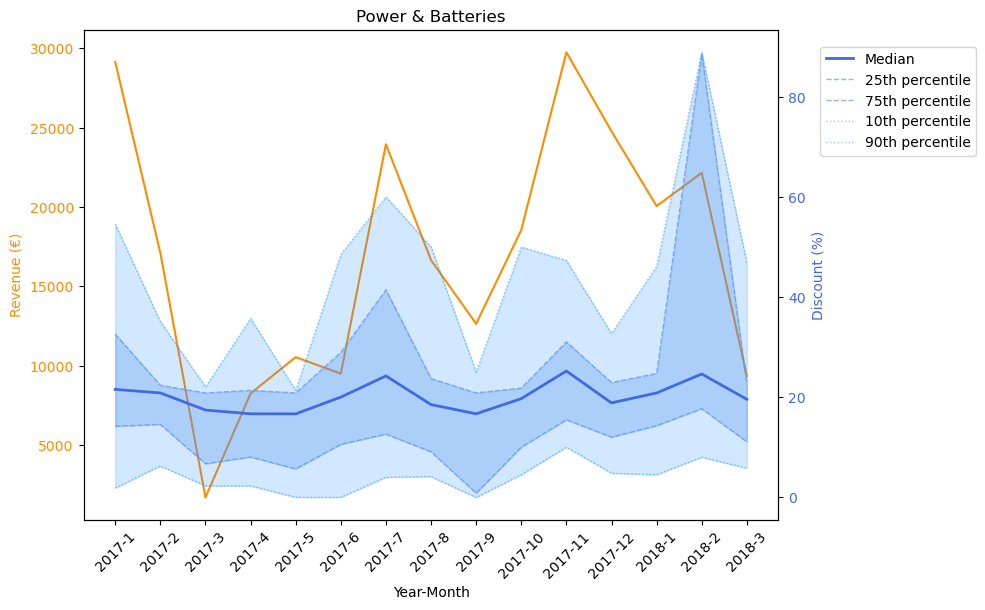

In [ ]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Power & Batteries', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({'order_product_price': 'sum', 
                    'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
                    })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['order_product_price', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Revenue (€)', color=color)
sns.lineplot(x=x_labels, y='order_product_price', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.05, 0.98))

fig.tight_layout()
plt.title('Power & Batteries')
plt.show();

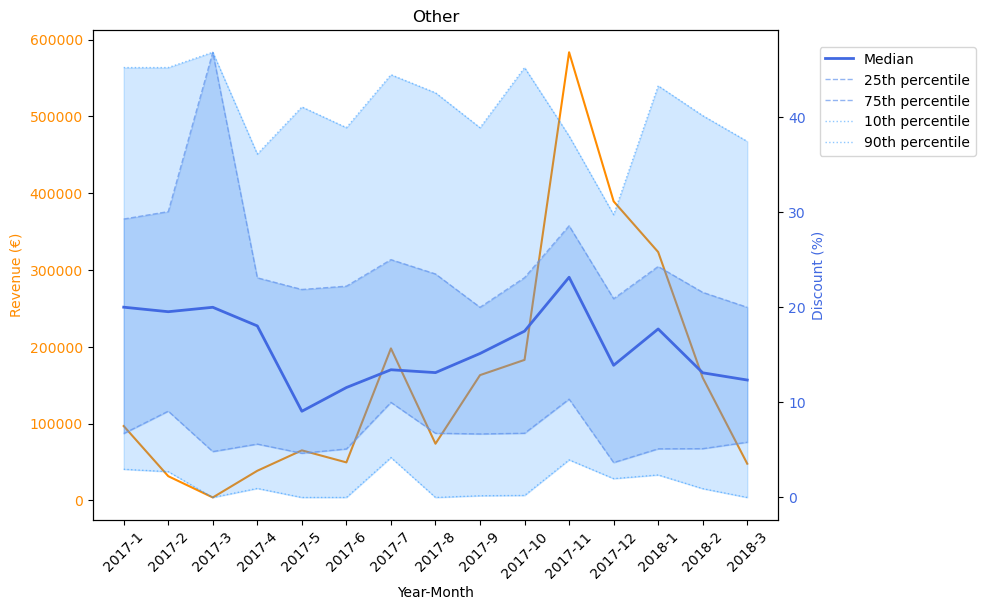

In [ ]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Other', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({'order_product_price': 'sum', 
                    'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
                    })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['order_product_price', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Revenue (€)', color=color)
sns.lineplot(x=x_labels, y='order_product_price', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.05, 0.98))

fig.tight_layout()
plt.title('Other')
plt.show();